In [1]:
!pip install scipy

In [18]:
from scipy import stats as st 
import numpy as np
from scipy.stats import norm,expon
import matplotlib.pyplot as plt
# fig, ax=plt.subplots(1,1)


In [5]:
s = 0.9555
mean, var, skew, kurt = st.lognorm.stats(s, moments='mvsk')

In [6]:
x=np.linspace(st.lognorm.ppf(0.01,s ),
              st.lognorm.ppf(0.99,s),100)
ax.plot(x,st.lognorm.pdf(x, s), 'r-',lw=5,alpha=0.6,label='lognorm pdf')

NameError: ignored

In [7]:
bau=[1,2,3,4,5,6]
iterator=iter(bau)
x=next(iterator)
print(x)

1


In [8]:
x=4
s='ciao' if x > 1 else 'arrivederci'
s

'ciao'

In [9]:
tup=(1,2,3,3,4,5,8,('stringaaa',))
a,s,d,f,g,h,j,k=tup
tup=list(tup)
tup[0]=33
tup
type(tup[7])
a

1

In [10]:
d=[3,5,7,9]
a,c,b,m=d

In [11]:
tuuple=(0,1,'ciao',[1,2,3,4,54])
liist=['list1','list2']
tuuple[::-1]
zipped=zip(tuuple,liist)
list(zipped)
tuuple[3][0]=12

In [12]:
#options price generator
# S_t=input() #stock price at time t
r=0.1 ##float(input('risk free rate: '))
S_0=50#float(input('prezzo dell\'azione al tempo 0: ')) #stock price at time 0
st_dev=0.3#float(input('deviazione standard: '))  #standard deviation
# mean=float(input('media: '))  # mean 
t=3/12#float(input('time between S_0 and S_t: ')) # time between S_0 and S_t
W_t= norm(loc=0,scale=np.sqrt(t)) # Brownian stochastic process ~(0,sqrt(t)) 
#funzionde per stimare il prezzo di un'azione 
def stima_del_prezzo_dell_azione_in_t(S_0,st_dev,r,t,W_t):
  S_t=S_0*np.exp((r-st_dev**2/2)*t+st_dev*W_t.rvs())
  return S_t

stima_del_prezzo_dell_azione_in_t(S_0,st_dev,r,t,W_t)
#funzione per stimare il valore atteso di un'azione asal tempo t
def expected_value_of_S_t(S_0,st_dev,r,t,W_t):
  EV=S_0*np.exp((r-st_dev**2/2)*t)

K=50 #int(input('stike price: ')) #stike price
stochastic_standard_norm=norm(loc=0,scale=1)

# funzione per calcolare d1 del modello black and scholes
def calculate_d_1(S_0,st_dev,r,t):
  global d_1
  d_1=(np.log(S_0/K)+(r+(st_dev**2/2))*t)/(st_dev*np.sqrt(t))
  return d_1
# funzione per calcolare d2 del modello black and scholes
def calculate_d_2(S_0,st_dev,r,t):
  global d_2
  d_2=(np.log(S_0/K)+(r-(st_dev**2/2))*t)/(st_dev*np.sqrt(t)) #d_2=d_1-st_dev*np.sqrt(t) 
  return d_2
# funzione per calcolare il prezzo della call
def call_option_price(d_1,d_2,S_0,st_dev,r,t):
  c=S_0*stochastic_standard_norm.cdf(d_1)-K*np.exp(-r*t)*stochastic_standard_norm.cdf(d_2)
  return c
#  funzione per calcolare il prezzo della put
def put_option_price(d_1,d_2,S_0,st_dev,r,t):
  p=K*np.exp(-r*t)*stochastic_standard_norm.cdf(-d_2)-S_0*stochastic_standard_norm.cdf(-d_1)
  return p

print(calculate_d_1(S_0,st_dev,r,t))
print(calculate_d_2(S_0,st_dev,r,t))
print(call_option_price(d_1,d_2,S_0,st_dev,r,t))
print(put_option_price(d_1,d_2,S_0,st_dev,r,t))

0.2416666666666667
0.09166666666666669
3.6104450660840186
2.3759406675006467


(array([0.03669645, 0.13677767, 0.3602924 , 0.58714318, 0.77396146,
        0.70390461, 0.47038175, 0.19015432, 0.06004873, 0.0166802 ]),
 array([-1.384967  , -1.08521048, -0.78545395, -0.48569742, -0.18594089,
         0.11381563,  0.41357216,  0.71332869,  1.01308521,  1.31284174,
         1.61259827]),
 <a list of 1 Patch objects>)

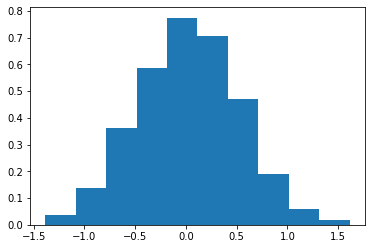

In [13]:
sample=[]
for i in range(1000):
  sample.append(W_t.rvs())
plt.hist(sample,density=True,histtype='stepfilled')  

In [14]:
stochastic_v=norm(loc=0,scale=1)
stochastic_v.cdf(-0.09)

0.4641436074148279

In [15]:
# credit risk


mean should be ~ 0: 0.004771098985783815 st. deviation should be ~1:  1.3835778392883578


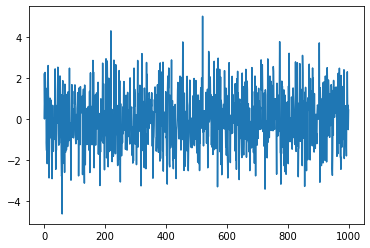

In [16]:
#random walk
stochastic_1=norm(loc=0,scale=1)
stochastic_2=norm(loc=0,scale=1)
v_a=[]
for i in range(1000):
  v_a.append(stochastic_1.rvs()-stochastic_2.rvs())
plt.plot(v_a)
print('mean should be ~ 0:',np.mean(v_a), 'st. deviation should be ~1: ',np.std(v_a))

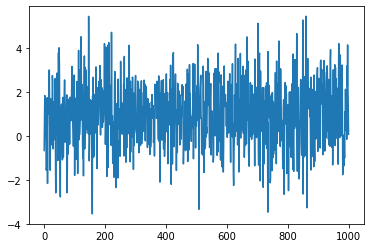

In [17]:
#random walk with drift
stochastic_1=norm(loc=0,scale=1)
stochastic_2=norm(loc=0,scale=1)
v_a=[]
for i in range(1000):
  v_a.append(stochastic_1.rvs()-stochastic_2.rvs()+1)
plt.plot(v_a)



(array([ 951.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9049.]),
 array([ 0.        ,  8.60707976, 17.21415953, 25.82123929, 34.42831906,
        43.03539882, 51.64247859, 60.24955835, 68.85663811, 77.46371788,
        86.07079764]),
 <a list of 10 Patch objects>)

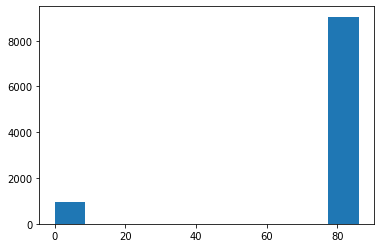

In [63]:
def funzione_indicatrice(momento_aleatorio_default,tempo):
  if momento_aleatorio_default < tempo:
    I=0
  else:
    I=1
  return I
T=1 #float(input('T: '))
t=0.5 #float(input('t: '))
my_lambda=0.20
FACE_VALUE=100
tau=expon(scale=1/my_lambda)
prezzo=[]
# plt.plot(tau.rvs(size=100))
for i in range(10000):
  prezzo_del_derivato_rischioso=FACE_VALUE*np.exp(-(r+my_lambda)*(T-t)) * funzione_indicatrice(tau.rvs(),t)
  prezzo.append(prezzo_del_derivato_rischioso)
plt.hist(prezzo)